In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('SeoulBikeData.csv')
data = data.drop('Functioning Day',axis=1)
data = data.drop('Date',axis=1)
data = data.drop('Seasons',axis=1)
data = pd.get_dummies(data)
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday_Holiday,Holiday_No Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,False,True
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,False,True
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,False,True
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,False,True
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,False,True


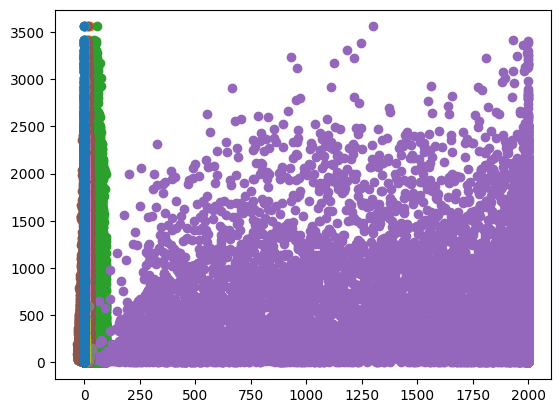

In [3]:
def draw_scatter(feature):
    plt.scatter(feature,data['Rented Bike Count'])

draw_scatter(data['Hour'])
draw_scatter(data['Temperature(°C)'])
draw_scatter(data['Humidity(%)'])
draw_scatter(data['Wind speed (m/s)'])
draw_scatter(data['Visibility (10m)'])
draw_scatter(data['Dew point temperature(°C)'])
draw_scatter(data['Solar Radiation (MJ/m2)'])
draw_scatter(data['Rainfall(mm)'])
draw_scatter(data['Snowfall (cm)'])
draw_scatter(data['Holiday_Holiday'])
draw_scatter(data['Holiday_No Holiday'])

In [4]:
x = data.drop('Rented Bike Count',axis=1)
y = data['Rented Bike Count']
msk = np.random.randn(len(x)) < 0.8
train_x = x[msk]
train_y = y[msk]
test_x = x[~msk]
test_y = y[~msk]
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)

LinearRegression()

In [5]:
from sklearn.metrics import r2_score
y_hat = regr.predict(test_x)
print(r2_score(test_y,y_hat))

0.4830697669099234


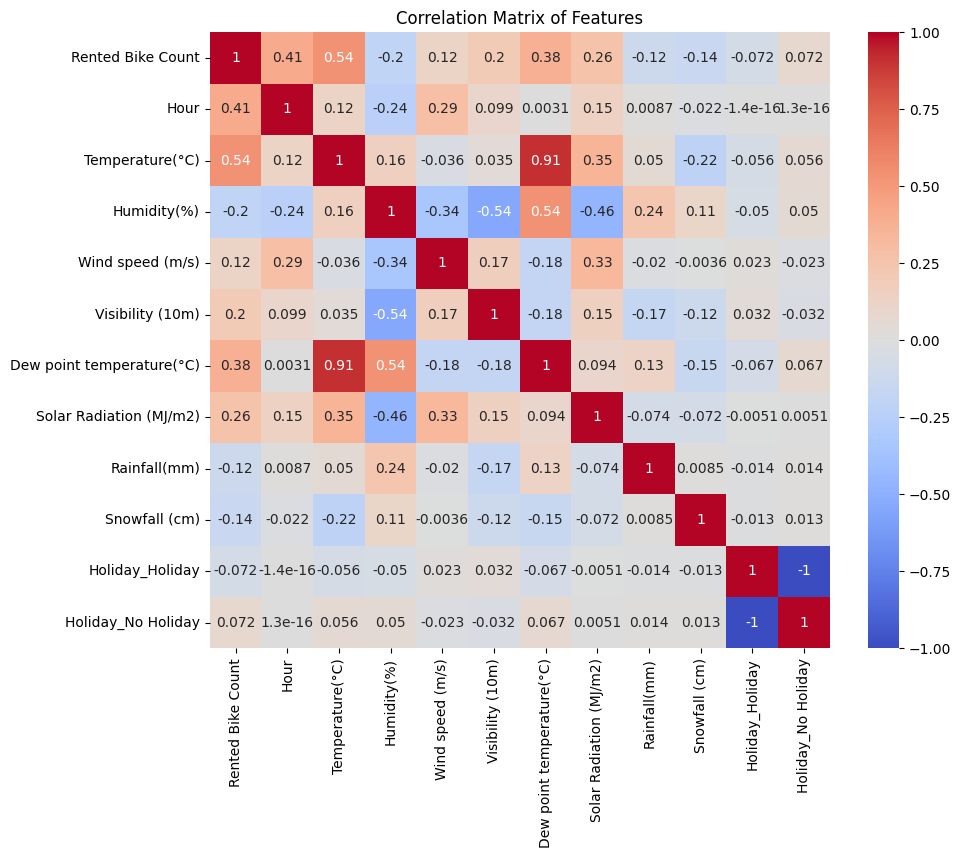

R² Score: 0.4830697669099234
MAE: 338.2155638321769
RMSE: 461.7243703427472
Random Forest R² Score: 0.778900160445453
Random Forest MAE: 186.3216657504123
Random Forest RMSE: 301.96808509108854


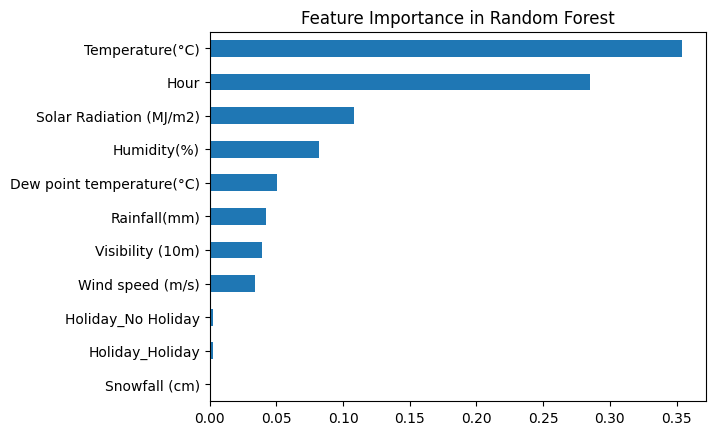

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
import seaborn as sns
import numpy as np

# محاسبه همبستگی
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# ارزیابی مدل با معیارهای اضافی
y_hat = regr.predict(test_x)
print("R² Score:", r2_score(test_y, y_hat))
print("MAE:", mean_absolute_error(test_y, y_hat))
print("RMSE:", root_mean_squared_error(test_y, y_hat))  # استفاده از تابع جدید

# آزمایش مدل Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train_x, train_y)
y_hat_rf = rf_model.predict(test_x)
print("Random Forest R² Score:", r2_score(test_y, y_hat_rf))
print("Random Forest MAE:", mean_absolute_error(test_y, y_hat_rf))
print("Random Forest RMSE:", root_mean_squared_error(test_y, y_hat_rf))

# اهمیت ویژگی‌ها
feature_importance = pd.Series(rf_model.feature_importances_, index=train_x.columns)
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance in Random Forest')
plt.show()